In [1]:
mnli_matched_data_file = "../temp/multinli_1.0_dev_matched.jsonl-2.jsonl"
mnli_mismatched_data_file = "../temp/multinli_1.0_dev_mismatched.jsonl.jsonl"

In [2]:
import pandas as pd, nltk
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 0)

In [3]:
df_matched = pd.read_json(mnli_matched_data_file, lines=True, orient='records')
print(df_matched.shape)
df_matched.head(n=3)


(20000, 4)


,prediction,predicted_raw_text,raw_data_tokens,raw_data
0,"[There, i, away, of, final, -, court, The, The, The, The, The, The, The, The, The, i, The, The, The, The, i, The, The, The, The, The, The, The, The, The, The, i, i, i, i, i, The, The, The, The, The, The, The, The, The, The, The, The, The, i, Postal, i, The, The, The, The, The, The, The, The, The, The, what, The, The, The, The, i, The, The, The, The, The, The, i, The, The, The, The, The, i, The, i, The, i, The, The, The, The, The, The, The, The, The, The, The, The, The, The, ...]",The new rights are nice enough,"[[CLS], The, new, rights, are, nice, enough, [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], ...]",The new rights are nice enough
1,"[The, do, people, was, It, there, i, Postal, Postal, Postal, Postal, ,, Postal, Postal, Postal, Postal, i, what, what, Postal, Postal, i, ,, Postal, Postal, Postal, ,, Postal, Postal, i, Postal, Postal, what, i, what, what, what, Postal, Postal, Postal, Postal, Postal, Postal, ,, Postal, Postal, Postal, Postal, i, what, what, Postal, what, what, Postal, Postal, ,, Postal, ,, ,, Postal, ,, Postal, what, Postal, Postal, Postal, Postal, what, other, ,, Postal, ,, Postal, Postal, what, he, he, he, Postal, he, what, he, i, can, i, from, from, from, from, from, from, from, from, from, from, from, from, from, from, ...]",Everyone really been the while benefits,"[[CLS], Everyone, really, likes, the, newest, benefits, [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], ...]",Everyone really likes the newest benefits
2,"[of, have, who, ), to, of, you, go, was, he, ., ., was, was, Postal, you, more, be, thought, i, Postal, there, ,, Postal, this, he, ,, this, Postal, what, Postal, Postal, what, what, what, what, what, Postal, Postal, Postal, this, this, ,, ,, this, ,, this, Postal, Postal, what, what, Postal, what, what, Postal, he, he, this, ,, ,, Postal, ,, he, what, Postal, Postal, this, Postal, what, this, ,, this, this, this, ,, what, he, he, he, he, he, what, he, i, There, what, is, is, is, There, is, is, There, There, is, is, is, is, is, is, ...]",This site includes a can of all of W and a theable O of Government and rule .,"[[CLS], This, site, includes, a, list, of, all, award, winners, and, a, search, ##able, database, of, Government, Executive, articles, ., [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [P

In [4]:
df_mismatched = pd.read_json(mnli_mismatched_data_file, lines=True, orient='records')

print(df_mismatched.shape)
df_mismatched.head(n=3)

(20000, 4)


,prediction,predicted_raw_text,raw_data_tokens,raw_data
0,"[of, ), She, ), ##ed, It, yeah, ., B, was, his, his, it, will, -, one, of, i, i, i, Postal, i, ,, Postal, Postal, he, ,, Postal, Postal, i, Postal, Postal, i, i, i, i, what, what, Postal, Postal, Postal, ,, Postal, ,, Postal, ,, Postal, i, i, what, i, Postal, i, what, Postal, he, he, Postal, ,, ,, Postal, ,, he, what, Postal, Postal, Postal, Postal, i, other, ,, Postal, ,, Postal, ,, i, he, he, he, other, he, i, he, i, to, i, The, to, The, The, to, The, The, The, The, to, is, to, The, The, ...]",Only could hold make it possible for us to provide our students with a quality education .,"[[CLS], Your, contribution, helped, make, it, possible, for, us, to, provide, our, students, with, a, quality, education, ., [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], ...]",Your contribution helped make it possible for us to provide our students with a quality education.
1,"[of, ), cover, you, you, go, says, will, his, ), ., ., i, Postal, Postal, Postal, what, what, what, Postal, Postal, i, ,, Postal, Postal, Postal, ,, Postal, Postal, i, Postal, Postal, what, i, what, what, what, what, Postal, Postal, Postal, ,, Postal, ,, Postal, ,, Postal, what, i, what, what, Postal, what, what, Postal, he, ,, Postal, ,, ,, Postal, ,, he, what, Postal, Postal, Postal, Postal, what, other, ,, Postal, ,, Postal, Postal, i, he, he, he, other, he, what, he, i, to, i, from, from, or, or, to, The, can, The, from, from, from, from, from, from, ...]",Only to were of no help with our students ' education .,"[[CLS], Your, contributions, were, of, no, help, with, our, students, ', education, ., [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], [PAD], ...]",Your contributions were of no help with our students' education.
2,"[that, i, some, lot, [CLS], was, not, will, was, ), the, [CLS], the, (, will, It, of, American, or, said, there, was, ., [CLS], he, (, was, ', were, early, during, staff, place, most, said, being, that, house, i, was, -, ., but, ,, you, he, ,, as, place, the, you, old, being, ##ing, a, don, She, The, i, ,, s, such, [CLS], night, It, She, was, that, or, but, -, he, She, ,, he, being, with, he, is, but, he, very, said, i, ., there, The, The, ., ., The, ., ., The, ., ., The, is, The, ., ...]","The maybe has nothing to do with their cause , however , but with the simple fact that di house on are not run in small - here subst justice ) we ; in other words , if one of the and of run is of ) ' ( as in She woman an before today ) , that does not make it different to their that one can are could for run in We run in the like every year . that are that that that that that that that that that that that that that that that that that that that that that that that that that that that that that that that that that that that that that that that that that that that that I that The The The The that The The The The The The The t The","[[CLS], The, 

In [5]:

def calc_word_len(df):
    df["raw_word_len"] = df["raw_data"].apply(lambda x: len(x.split(" ")))
    return df

def calc_edit_distance(df):
    df["edit_distance"] = df.apply(lambda r : nltk.edit_distance(r["predicted_raw_text"], r["raw_data"]), axis=1)
    return df
    


In [6]:
%%time

df_matched = df_matched.pipe(calc_word_len)\
          .pipe(calc_edit_distance)

df_mismatched = df_mismatched.pipe(calc_word_len)\
          .pipe(calc_edit_distance)

CPU times: user 6min 44s, sys: 329 ms, total: 6min 45s
Wall time: 6min 45s


In [7]:
def plot_hist_wordlen(df, ax, title):
    df["raw_word_len"].plot.hist(bins=250, title=title, ax=ax)


def plot_hist_editdist(df, ax, title):
    df["edit_distance"].plot.hist(bins=1050, ax=ax, title =title)


def plot_word_len_vs_edit(df, ax, title):
    ax.scatter(df["raw_word_len"], df["edit_distance"] )
    ax.set_title(title)
    ax.set_xlabel("Word length")
    ax.set_ylabel("Edit distance")




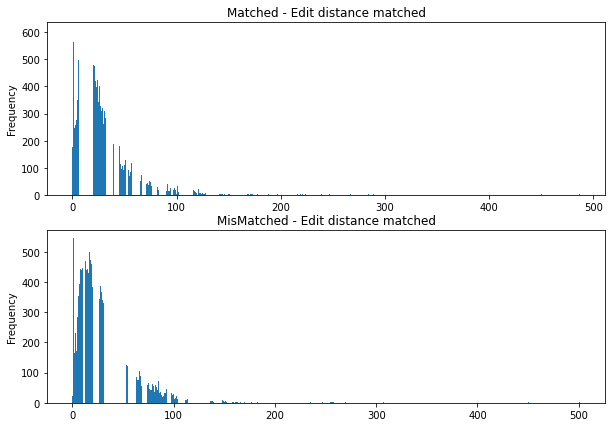

In [13]:
_, ax= plt.subplots(2,1, figsize=(10,7))

plot_hist_editdist(df_matched, ax[0], title="Matched - Edit distance matched")
plot_hist_editdist(df_mismatched, ax[1], title="MisMatched - Edit distance matched")


plt.show()

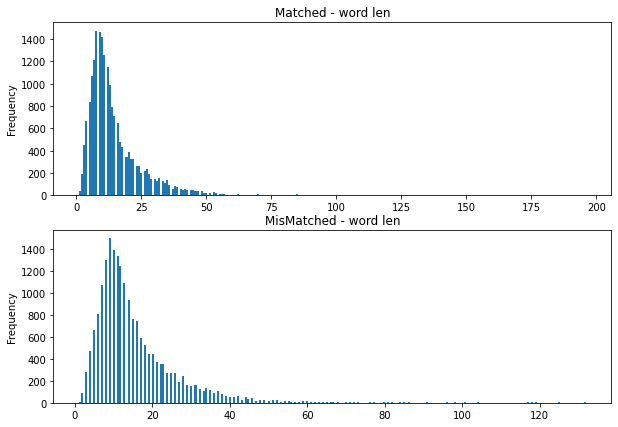

In [14]:
_, ax= plt.subplots(2,1, figsize=(10,7))

plot_hist_wordlen(df_matched, ax[0], title="Matched - word len")
plot_hist_wordlen(df_mismatched, ax[1], title="MisMatched - word len")


plt.show()

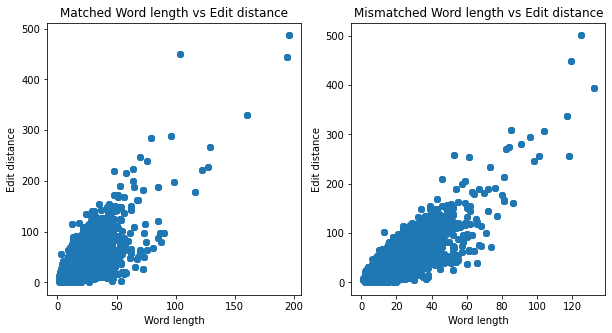

In [15]:
_, ax= plt.subplots(1,2, figsize=(10,5))

plot_word_len_vs_edit(df_matched,ax[0], "Matched Word length vs Edit distance")
plot_word_len_vs_edit(df_mismatched,ax[1], "Mismatched Word length vs Edit distance")
plt.show()

In [11]:
from plotnine import *

def plot_bin_word_vs_edit(df, word_length=50):
    return ggplot(data=df)  + geom_bin2d(mapping=aes(x="raw_word_len", y="edit_distance")) 



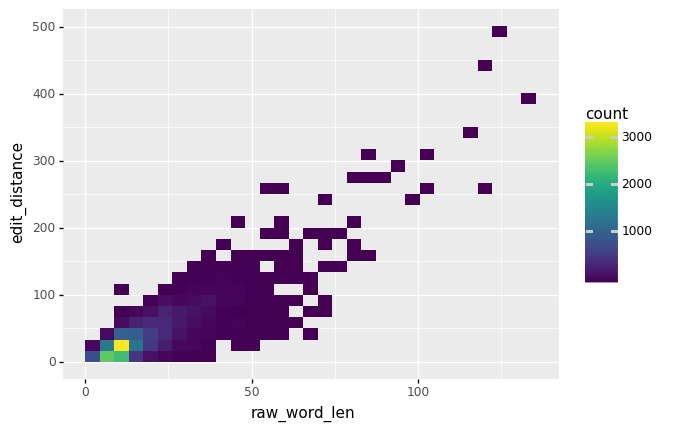

<ggplot: (8786379258617)>

In [16]:
plot_bin_word_vs_edit(df_mismatched)

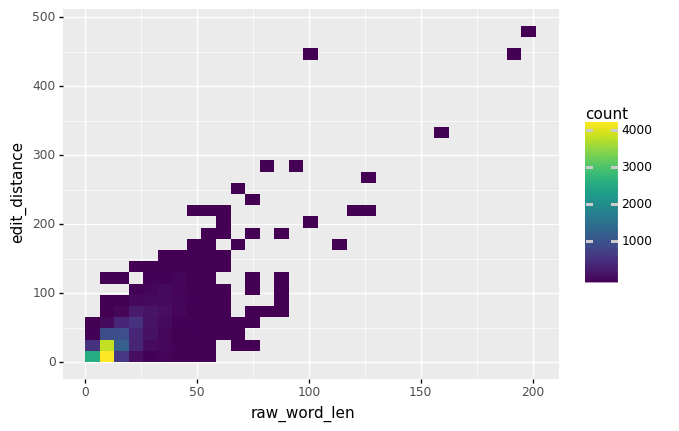

<ggplot: (8786570371561)>

In [17]:
plot_bin_word_vs_edit(df_matched)